In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [58]:
weather_df = pd.read_csv("CA_Weather_Fire_Dataset_1984-2025.csv")
fire_df = pd.read_csv("ca_daily_fire_2000_2021.csv")

In [59]:
# Load both weather_dfsets
weather_df = pd.read_csv("CA_Weather_Fire_Dataset_1984-2025.csv")
fire_df = pd.read_csv("ca_daily_fire_2000_2021.csv")

# Check column names
print("Weather Dataset Columns:\n", weather_df.columns)
print("\n Fire Dataset Columns:\n", fire_df.columns)


Weather Dataset Columns:
 Index(['DATE', 'PRECIPITATION', 'MAX_TEMP', 'MIN_TEMP', 'AVG_WIND_SPEED',
       'FIRE_START_DAY', 'YEAR', 'TEMP_RANGE', 'WIND_TEMP_RATIO', 'MONTH',
       'SEASON', 'LAGGED_PRECIPITATION', 'LAGGED_AVG_WIND_SPEED',
       'DAY_OF_YEAR'],
      dtype='object')

 Fire Dataset Columns:
 Index(['latitude', 'longitude', 'acq_date', 'satellite', 'instrument',
       'confidence', 'year', 'month'],
      dtype='object')


In [60]:

weather_df.rename(columns={"DATE": "Date"}, inplace=True)
fire_df.rename(columns={"acq_date": "Date"}, inplace=True)

In [61]:
weather_df["Date"] = pd.to_datetime(weather_df["Date"])
fire_df["Date"] = pd.to_datetime(fire_df["Date"])

<ipython-input-61-7afe7fe04f28>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather_df["Date"] = pd.to_datetime(weather_df["Date"])


In [62]:
fire_df["Fire_Observed"] = 1

In [63]:
fire_daily = fire_df.groupby("Date").agg({"Fire_Observed": "sum"}).reset_index()

In [64]:
merged_df = pd.merge(weather_df, fire_daily, on="Date", how="left")
merged_df["Fire_Observed"] = merged_df["Fire_Observed"].fillna(0)

In [65]:
X = ['MAX_TEMP', 'AVG_WIND_SPEED', 'PRECIPITATION']
X = merged_df[X]
y = merged_df['Fire_Observed']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [68]:
y_pred = xgb_model.predict(X_test)
residuals = y_test - y_pred

In [69]:
plt.figure(figsize=(20, 12))


<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

Text(0.5, 1.0, 'Correlation Matrix')

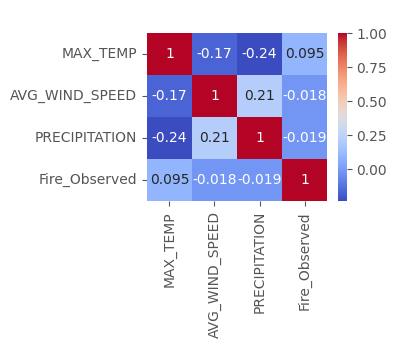

In [70]:
plt.subplot(2, 2, 1)
corr = merged_df[X.columns.tolist() + ['Fire_Observed']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")


Text(0.5, 1.0, 'Actual vs Predicted Fire Observations')

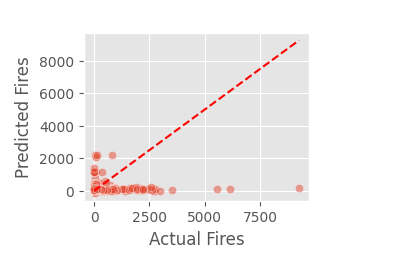

In [71]:
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fires")
plt.ylabel("Predicted Fires")
plt.title("Actual vs Predicted Fire Observations")

Text(0.5, 1.0, 'Residuals Distribution')

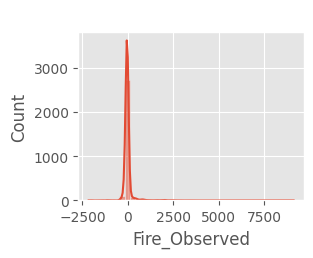

In [72]:
plt.subplot(2, 2, 3)
sns.histplot(residuals, bins=40, kde=True)
plt.title("Residuals Distribution")

Text(0.5, 1.0, ' Max Temp vs Fire Observed')

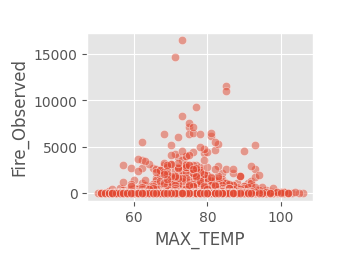

In [73]:
plt.subplot(2, 2, 4)
sns.scatterplot(data=merged_df, x='MAX_TEMP', y='Fire_Observed', alpha=0.5)
plt.title(" Max Temp vs Fire Observed")

In [74]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'MAX_TEMP'),
  Text(0, 1.5, 'AVG_WIND_SPEED'),
  Text(0, 2.5, 'PRECIPITATION'),
  Text(0, 3.5, 'Fire_Observed')])

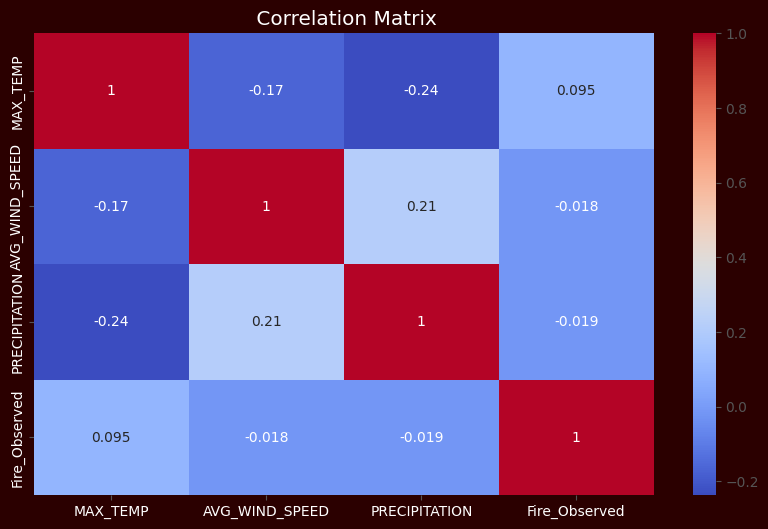

In [75]:
plt.figure(figsize=(10, 6), facecolor='#2B0000')  # deep maroon background
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title(" Correlation Matrix", color='white')
plt.gca().set_facecolor('#2B0000')  # Match plot background
plt.xticks(color='white')
plt.yticks(color='white')


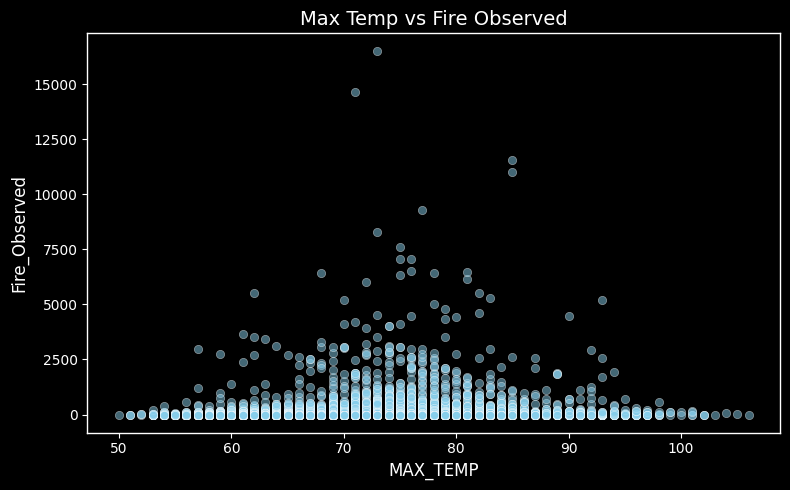

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_df, x='MAX_TEMP', y='Fire_Observed', alpha=0.5, color='skyblue')
plt.title("Max Temp vs Fire Observed", fontsize=14, color='white')
plt.xlabel("MAX_TEMP", color='white')
plt.ylabel("Fire_Observed", color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(False)
plt.tight_layout()
plt.savefig("dark_temp_vs_fire.png", dpi=300, facecolor='#1a1a1a')
plt.show()


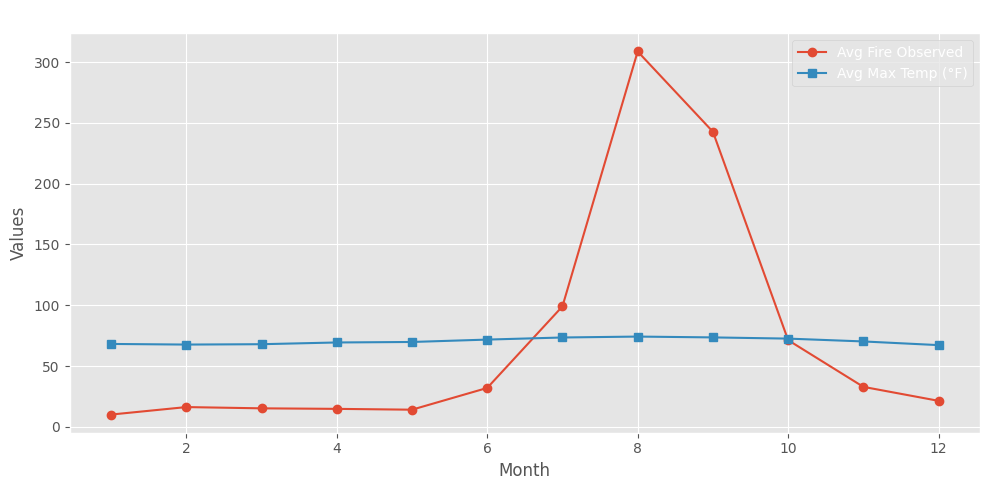

In [77]:
merged_df['Month'] = merged_df['Date'].dt.month
monthly_avg = merged_df.groupby('Month')[['MAX_TEMP', 'Fire_Observed']].mean().reset_index()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg['Month'], monthly_avg['Fire_Observed'], label='Avg Fire Observed', marker='o')
plt.plot(monthly_avg['Month'], monthly_avg['MAX_TEMP'], label='Avg Max Temp (°F)', marker='s')
plt.title("Monthly Avg Temp vs Fire Observed")
plt.xlabel("Month")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


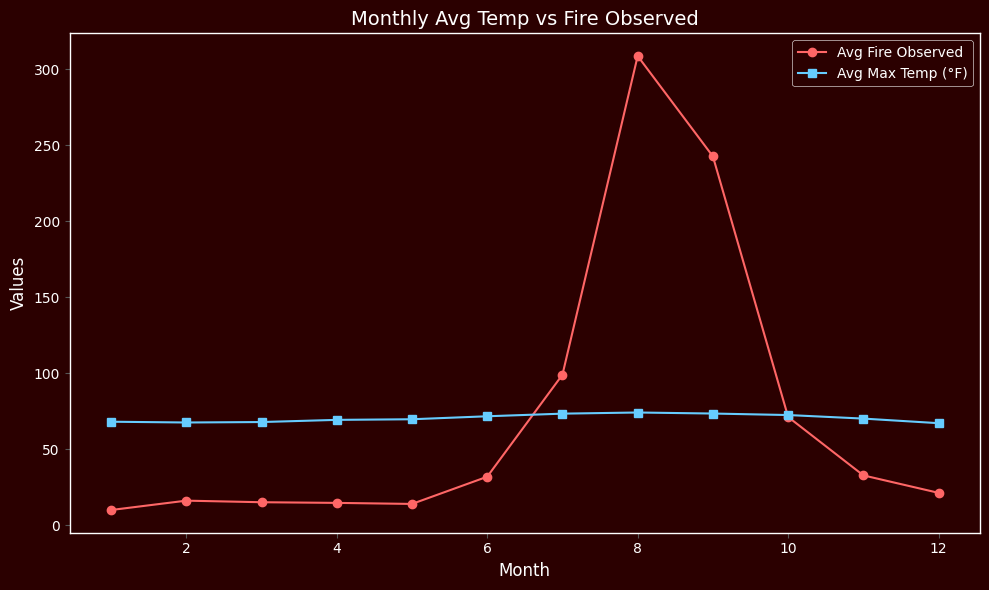

In [78]:
import matplotlib.pyplot as plt

# Assuming monthly_avg is your DataFrame with 'Month', 'MAX_TEMP', and 'Fire_Observed'
plt.figure(figsize=(10, 6), facecolor='#2B0000')  # Outer background

# Line plots
plt.plot(monthly_avg['Month'], monthly_avg['Fire_Observed'], label='Avg Fire Observed', marker='o', color='#ff6666')
plt.plot(monthly_avg['Month'], monthly_avg['MAX_TEMP'], label='Avg Max Temp (°F)', marker='s', color='#66ccff')

# Title and labels
plt.title("Monthly Avg Temp vs Fire Observed", fontsize=14, color='white')
plt.xlabel("Month", color='white')
plt.ylabel("Values", color='white')

# Ticks color
plt.xticks(color='white')
plt.yticks(color='white')

# Legend with white text
legend = plt.legend(facecolor='#2B0000', edgecolor='white', labelcolor='white')
for text in legend.get_texts():
    text.set_color("white")

# Set inner plot background
plt.gca().set_facecolor('#2B0000')  # Match inner plot background

# Grid off
plt.grid(False)

# Tight layout and show/save
plt.tight_layout()
plt.savefig("monthly_fire_vs_temp_dark.png", dpi=300, facecolor='#2B0000')
plt.show()


In [79]:
print(fire_df.columns)


Index(['latitude', 'longitude', 'Date', 'satellite', 'instrument',
       'confidence', 'year', 'month', 'Fire_Observed'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


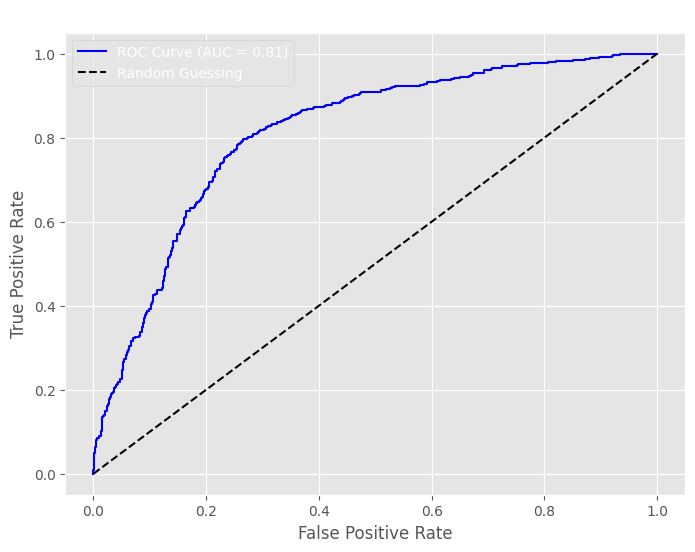

GBT RMSE (log scale): 1.4892346416588056
GBT R² (log scale): 0.13833069818563992


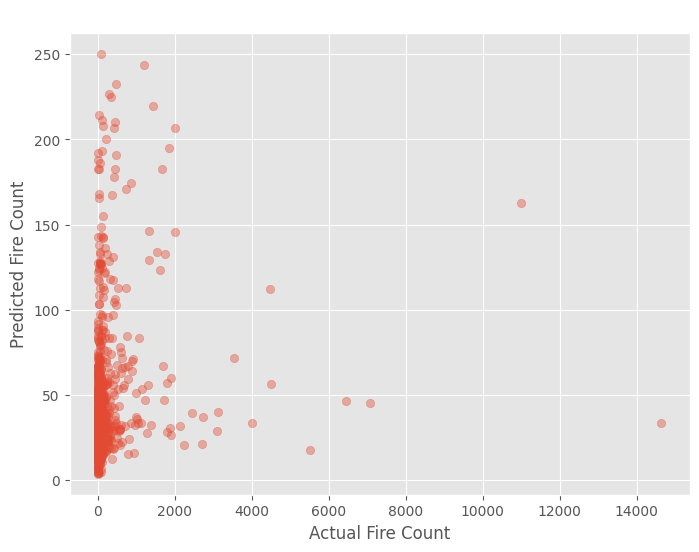

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' to datetime in Pandas
fire_df['Date'] = pd.to_datetime(fire_df['Date'])
fire_df['year'] = fire_df['Date'].dt.year
fire_df['month'] = fire_df['Date'].dt.month
fire_df['day'] = fire_df['Date'].dt.day

# Aggregate fire counts by date
fire_counts = fire_df.groupby("Date").size().reset_index(name="fire_count")

# Convert 'Date' column in weather_df
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

# Merge fire counts with weather_df
fire_weather = pd.merge(weather_df, fire_counts, on="Date", how="inner")

# Clean and prepare weather data
fire_weather_clean = fire_weather.dropna()
fire_weather_clean['label'] = fire_weather_clean['FIRE_START_DAY'].astype(int)

# Select features
features = [
    "PRECIPITATION", "MAX_TEMP", "MIN_TEMP", "AVG_WIND_SPEED",
    "TEMP_RANGE", "WIND_TEMP_RATIO",
    "LAGGED_PRECIPITATION", "LAGGED_AVG_WIND_SPEED"
]

# Prepare data for Logistic Regression
X = fire_weather_clean[features]
y = fire_weather_clean['label']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_probs = lr_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("📉 ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

# GBT Regressor (using GradientBoostingRegressor in sklearn)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

fire_weather_clean['label'] = np.log1p(fire_weather_clean['fire_count'])
X_gbt = fire_weather_clean[features]
y_gbt = fire_weather_clean['label']

X_train_gbt, X_test_gbt, y_train_gbt, y_test_gbt = train_test_split(X_gbt, y_gbt, test_size=0.2, random_state=42)

gbt_model = GradientBoostingRegressor(n_estimators=100)
gbt_model.fit(X_train_gbt, y_train_gbt)
y_pred_gbt = gbt_model.predict(X_test_gbt)

rmse = np.sqrt(mean_squared_error(y_test_gbt, y_pred_gbt))
r2 = r2_score(y_test_gbt, y_pred_gbt)

print("GBT RMSE (log scale):", rmse)
print("GBT R² (log scale):", r2)

# Back-transform predictions
actual_count = np.expm1(y_test_gbt)
predicted_count = np.expm1(y_pred_gbt)

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(actual_count, predicted_count, alpha=0.4)
plt.xlabel("Actual Fire Count")
plt.ylabel("Predicted Fire Count")
plt.title("GBT: Actual vs Predicted Fire Count")
plt.grid(True)
plt.show()
